In [1]:
pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-macosx_10_9_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-macosx_10_9_x86_64.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 4.5 MB/s eta 0:00:0000:0100:02
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached flatbuffers-24.3.25-py2.py3-none

In [5]:
import tensorflow as tf
print(tf.config.list_physical_devices('CPU'))


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Test'
val_dir = '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Validation'


train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


2024-09-14 19:56:14.750357: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 10905 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [6]:

dataset_dir = '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Train'
real_dir = os.path.join(dataset_dir, 'real')
fake_dir = os.path.join(dataset_dir, 'fake')

real_images = os.listdir(real_dir)
fake_images = os.listdir(fake_dir)

print(f"Number of real images: {len(real_images)}")
print(f"Number of fake images: {len(fake_images)}")


Number of real images: 70001
Number of fake images: 70001


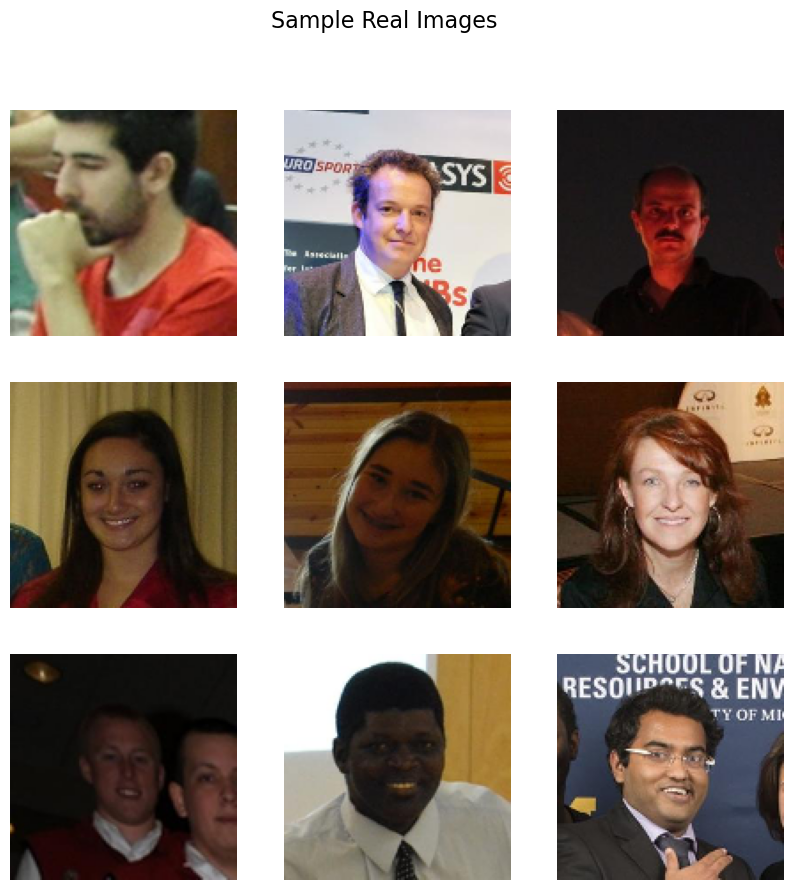

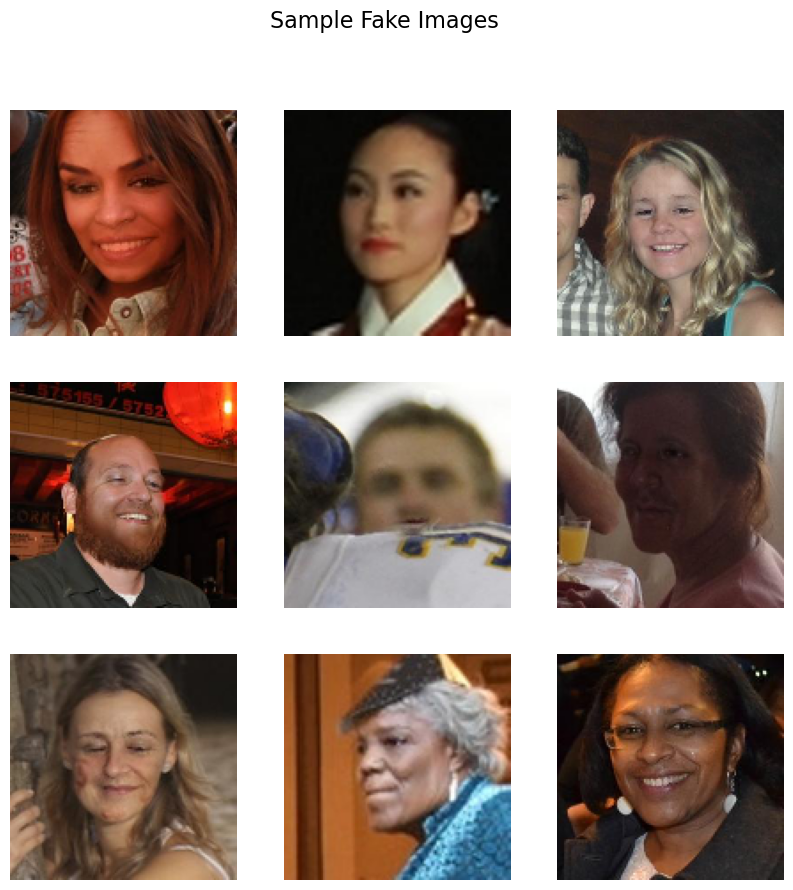

In [7]:
def plot_sample_images(images_list, title, rows=3, cols=3):
    plt.figure(figsize=(10, 10))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        img = load_img(os.path.join(images_list[i]), target_size=(128, 128))
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()


plot_sample_images([os.path.join(real_dir, img) for img in real_images[:9]], title="Sample Real Images")


plot_sample_images([os.path.join(fake_dir, img) for img in fake_images[:9]], title="Sample Fake Images")


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


cnn_model = Sequential([
    Input(shape=(128, 128, 3)), 
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])


cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input


nn_model = Sequential([
    Input(shape=(128, 128, 3)),  
    Flatten(),  
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])


nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


nn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,330,689 (96.63 MB)

 Trainable params: 25,330,689 (96.63 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_generator = datagen.flow_from_directory(
    '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


NameError: name 'ImageDataGenerator' is not defined

In [16]:
cnn_history = cnn_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5


/Users/shalini/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3501/3501 ━━━━━━━━━━━━━━━━━━━━ 1163s 332ms/step - accuracy: 0.8017 - loss: 0.4111 - val_accuracy: 0.9086 - val_loss: 0.2152
Epoch 2/5
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 1160s 331ms/step - accuracy: 0.9314 - loss: 0.1677 - val_accuracy: 0.9309 - val_loss: 0.1754
Epoch 3/5
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 1171s 334ms/step - accuracy: 0.9486 - loss: 0.1286 - val_accuracy: 0.9206 - val_loss: 0.1930
Epoch 4/5
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 1158s 331ms/step - accuracy: 0.9578 - loss: 0.1051 - val_accuracy: 0.9306 - val_loss: 0.1838
Epoch 5/5
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 1296s 370ms/step - accuracy: 0.9628 - loss: 0.0920 - val_accuracy: 0.9391 - val_loss: 0.1592


In [17]:
nn_history = nn_model.fit(
    train_generator,
    epochs=2,
    validation_data=validation_generator
)

Epoch 1/2
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 1119s 319ms/step - accuracy: 0.5442 - loss: 1.5545 - val_accuracy: 0.6917 - val_loss: 0.6145
Epoch 2/2
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 1151s 329ms/step - accuracy: 0.5861 - loss: 0.6520 - val_accuracy: 0.7276 - val_loss: 0.5975


In [18]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the pre-trained Xception model, excluding the top layers
base_model = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Dense layer with ReLU activation
predictions = Dense(1, activation='sigmoid')(x)  # Sigmoid activation for binary classification

# Create the final model
cnn_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer and binary cross-entropy loss
cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the train and validation generators you've already set up
cnn_history = cnn_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/5
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 2335s 666ms/step - accuracy: 0.7250 - loss: 0.5372 - val_accuracy: 0.7627 - val_loss: 0.4827
Epoch 2/5
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 2519s 719ms/step - accuracy: 0.7705 - loss: 0.4678 - val_accuracy: 0.7737 - val_loss: 0.4634
Epoch 3/5
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 2433s 695ms/step - accuracy: 0.7910 - loss: 0.4375 - val_accuracy: 0.7744 - val_loss: 0.4609
Epoch 4/5
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 14162s 4s/step - accuracy: 0.8117 - loss: 0.4063 - val_accuracy: 0.7778 - val_loss: 0.4591
Epoch 5/5
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 20435s 6s/step - accuracy: 0.8280 - loss: 0.3754 - val_accuracy: 0.7874 - val_loss: 0.4481


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Data generators (you already set these up)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Load the pre-trained DenseNet121 model, excluding the top layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Dense layer with ReLU activation
predictions = Dense(1, activation='sigmoid')(x)  # Sigmoid activation for binary classification

# Create the final model
cnn_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer and binary cross-entropy loss
cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Found 112002 images belonging to 2 classes.
Found 7885 images belonging to 2 classes.
Epoch 1/5


/Users/shalini/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3501/3501 ━━━━━━━━━━━━━━━━━━━━ 2955s 841ms/step - accuracy: 0.7602 - loss: 0.4827 - val_accuracy: 0.8235 - val_loss: 0.3917
Epoch 2/5
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 3425s 978ms/step - accuracy: 0.8026 - loss: 0.4161 - val_accuracy: 0.8237 - val_loss: 0.3840
Epoch 3/5
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 7476s 2s/step - accuracy: 0.8162 - loss: 0.3924 - val_accuracy: 0.8209 - val_loss: 0.3867
Epoch 4/5
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 3148s 899ms/step - accuracy: 0.8275 - loss: 0.3715 - val_accuracy: 0.8353 - val_loss: 0.3660
Epoch 5/5
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 3278s 936ms/step - accuracy: 0.8419 - loss: 0.3493 - val_accuracy: 0.8019 - val_loss: 0.4221


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Data generators (you already set these up)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Load the pre-trained EfficientNetB3 model, excluding the top layers
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Dense layer with ReLU activation
predictions = Dense(1, activation='sigmoid')(x)  # Sigmoid activation for binary classification

# Create the final model
cnn_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer and binary cross-entropy loss
cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(
    train_generator,
    epochs=10,  # You can increase the epochs for better results
    validation_data=validation_generator
)

# Optionally, unfreeze some layers for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers
    layer.trainable = True

cnn_model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model
cnn_history_fine_tune = cnn_model.fit(
    train_generator,
    epochs=5,  # Fine-tune for a few more epochs
    validation_data=validation_generator
)


Found 112002 images belonging to 2 classes.
Found 7885 images belonging to 2 classes.
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
3501/3501 ━━━━━━━━━━━━━━━━━━━━ 3348s 953ms/step - accuracy: 0.5045 - loss: 0.6979 - val_accuracy: 0.4969 - val_loss: 0.6947
Epoch 2/10
1963/3501 ━━━━━━━━━━━━━━━━━━━━ 23:28 916ms/step - accuracy: 0.5111 - loss: 0.6945

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Data generators (you already set these up)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Load the pre-trained EfficientNetB3 model, excluding the top layers
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Dense layer with ReLU activation
predictions = Dense(1, activation='sigmoid')(x)  # Sigmoid activation for binary classification

# Create the final model
cnn_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer and binary cross-entropy loss
cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(
    train_generator,
    epochs=5,  # You can increase the epochs for better results
    validation_data=validation_generator
)

# Optionally, unfreeze some layers for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze the last 20 layers
    layer.trainable = True

cnn_model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model
cnn_history_fine_tune = cnn_model.fit(
    train_generator,
    epochs=3,  # Fine-tune for a few more epochs
    validation_data=validation_generator
)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Assuming you have defined and trained your model above
# Example architecture (replace with your actual model)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification (Real/Fake)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming your model is already trained, skip to the testing part
# Alternatively, train your model here with model.fit()

# Function to preprocess the input image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Convert to batch format
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Function to make a prediction
def predict_image(model, img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    if prediction[0][0] > 0.5:
        return "Fake"
    else:
        return "Real"

# Path to the test images
test_images_dir = 'path_to_test_images'

# Loop through test images and print predictions
for img_name in os.listdir(test_images_dir):
    img_path = os.path.join(test_images_dir, img_name)
    result = predict_image(model, img_path)
    print(f"{img_name} is predicted to be {result}")

In [ ]:
# Function to preprocess the input image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Convert to batch format
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Function to make a prediction
def predict_image(model, img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    if prediction[0][0] > 0.5:
        return "Fake"
    else:
        return "Real"

# Path to the test images
test_images_dir = 'path_to_test_images'

# Loop through test images and print predictions
for img_name in os.listdir(test_images_dir):
    img_path = os.path.join(test_images_dir, img_name)
    result = predict_image(model, img_path)
    print(f"{img_name} is predicted to be {result}")

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Define the CNN model (replace with your actual model if needed)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create an instance of ImageDataGenerator for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Rescale pixel values from 0-255 to 0-1
    shear_range=0.2,      # Apply random shear transformations
    zoom_range=0.2,       # Apply random zoom
    horizontal_flip=True  # Randomly flip images horizontally
)

valid_datagen = ImageDataGenerator(rescale=1./255)  # Rescale validation data, no augmentation

# Create the train and validation generators
train_generator = train_datagen.flow_from_directory(
    '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Train',    # Replace with your training data path
    target_size=(224, 224),  # Resize images to match input shape of the model
    batch_size=32,           # Adjust batch size as needed
    class_mode='binary'      # Binary classification
)

validation_generator = valid_datagen.flow_from_directory(
    '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Validation',  # Replace with your validation data path
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Train the model with the data generators
cnn_history = model.fit(
    train_generator,
    epochs=1,                # Set the number of epochs as needed
    validation_data=validation_generator
)

# Function to preprocess input images for prediction
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Convert to batch format
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Function to make a prediction on a single image
def predict_image(model, img_path):
    img = preprocess_image(img_path)
    prediction = model.predict(img)
    if prediction[0][0] > 0.5:
        return "Fake"
    else:
        return "Real"

# Path to the test images
test_images_dir = '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Test/fake_74.jpg'

# Loop through test images and print predictions
for img_name in os.listdir(test_images_dir):
    img_path = os.path.join(test_images_dir, img_name)
    result = predict_image(model, img_path)
    print(f"{img_name} is predicted to be {result}")


/Users/shalini/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


/Users/shalini/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 5794s 1s/step - accuracy: 0.7103 - loss: 0.5653 - val_accuracy: 0.8145 - val_loss: 0.4223


FileNotFoundError: [Errno 2] No such file or directory: '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Test/fake_74.jpg'

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import os 
# Function to preprocess input images for prediction
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Convert to batch format
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Function to make a prediction on a single image
def predict_image(cnn_model, img_path):
    img = preprocess_image(img_path)
    prediction = cnn_model.predict(img)
    if prediction[0][0] > 0.5:
        return "Fake"
    else:
        return "Real"

# Path to the test images
test_images_dir = '/Users/shalini/Desktop/DEEPFAKE DATASETS/Dataset/Test'

# Loop through test images and print predictions
for img_name in os.listdir(test_images_dir):
    img_path = os.path.join(test_images_dir, img_name)
    result = predict_image(cnn_model, img_path)
    print(f"{img_name} is predicted to be {result}")


NameError: name 'cnn_model' is not defined